Задача 2. Урсов, 414 гр.

Требуется решить задачу Коши для ОДУ первого порядка на заданном промежутке с заданной точностью методом ломанных (метод Коши). Проверить точность с помощью правила Рунге. Добавлено по чистой случайности сюда так же решение задачи Коши методом Рунге-Кутта 4-го порядка (неправильно прочитал в начале задание). 

Весь промежуток разбивается на $n$ частей. 

# Метод Эйлера:
\begin{equation}
y_{i+1} = y_i + h f(x_i, y_i), i = \overline{0,n} \\
\end{equation}
Точность метода равна $O(h)$.


# Метод Рунге-Кутта 4-го порядка:
\begin{align}
y_{i+1} = y_i + \frac{h}{6}(k_1 + 2k_2 + 3k_3 + k_4) , i = \overline{0,n} \\
k_1 = f(x_i,y_i); \\
k_2 = f(x_i + \frac{h}{2},y_i + \frac{h}{2}k_1); \\
k_3 = f(x_i + \frac{h}{2},y_i + \frac{h}{2}k_2); \\
k_4 = f(x_i + h,y_i + h k_3). \\
\end{align}
Точность метода равна $O(h^4)$.

# Правило Рунге:
Точность можно посчитать следующим способом. Мы решаем ОДУ сначала с шагом h, а потом решаем то же ОДУ с шагом h/2. Погрешность будем вычислять вот так:
\begin{equation}
\max\limits_{i = \overline{0,n}}\frac{|y_{i,h} - y_{i,h/2}|}{2^p - 1},
\end{equation}
$p$ - точность метода.
# Инструкция
Скомпилировать по очереди все ячейки. В дальнейшем компляцию можно начинать с ячейки, где определена функция (если изменить ОДУ и его параметры). Если что-то изменить в коде, то лучше все заново скомпилировать.

In [0]:
# Импортируем необходимые библиотеки.
import math
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# Определяем функцию, которая выводит массив значений функции y, полученный численным интегрированием ОДУ первого порядка. Аргументы: a, b - границы, на которых мы получаем решение,
# y0 - начальное значение функции в точке a, n - число разбиения всего промежутка.
def Eiler(a, b, y0, n):
  # Делаем сетку по x
  x = np.linspace(a, b, n)
  h = (b-a)/n
  y = [y0]
  # Заполняем массив значений y
  for i in range(1, n):
    #print(y)
    y0 = y0 + h*f(x[i-1],y0) 
    y.append(y0)
    #print(y[len(y)-1])
  # Возвращаем массив значений y
  return np.array(y)

In [0]:
# Определяем функции, необходимые для решения ОДУ методом Рунге-Кутта 4-го порядка.
def k1(x, y):
  return f(x, y)
def k2(x, y, h):
  return f(x + h/2, y + h*k1(x, y)/2)
def k3(x, y, h):
  return f(x + h/2, y + h*k2(x, y, h)/2)
def k4(x, y, h):
  return f(x + h, y + h*k3(x, y, h))
def Runge(a, b, y0, n):
  # Делаем сетку по x
  x = np.linspace(a, b, n)
  h = (b-a)/n
  y = [y0]
  # Заполняем массив значений y
  for i in range(1, n):
    y0 = y0 + (h/6)*(k1(x[i-1], y0) + 2*k2(x[i-1], y0, h) + 2*k3(x[i-1], y0, h) + k4(x[i-1], y0, h)) 
    y.append(y0)
  # Возвращаем массив значений y
  return np.array(y)

In [0]:
# Определяем функцию, на вход которой подается массив длиной 2*n, а возвращает она массив, состоящий только из четных элементов. Функция нужна для правила Рунге.
def even(x):
  y = []
  for i in range(0, x.size, 2):
    y.append(x[i])
  return y
# Определяем функцию, возращающую массив значений функций y решения ОДУ с заданной точностью. 
def Runge_Rule(a, b, y0, eps, p):
  # eps - погрешность. Задается пользователем нижу
  err = eps + 1
  # Стартовое разбиение, надо же с чего-то начать
  n0 = 10
  # Цикл. Завершается по достижении значении погрешности меньше заданной путем разбиения промежутка [a, b]. Каждый раз вычитаем из значений узлов сетки с n разбиениями значения узлов
  # сетки с 2*n разбиениями. Если не достигнута требуемая погрешность, то n = 2*n, то есть увеличиваем кол-во разбиений в два раза и повторяем цикл.  
  while err > eps:
    # Эйлер для n и 2*n разбиений
    if p == 1:
      Y0 = Eiler(a, b, y0, n0)
      Y20 = Eiler(a, b, y0, n0*2)
    # Аналогично Рунге-Кутте
    if p == 4:
      Y0 = Runge(a, b, y0, n0)
      Y20 = Runge(a, b, y0, n0*2)
    # Берем максимум погрешности в течение всего метода. (Можно было бы просто взять последние точки, т. к. погрешность там максимальная)
    err = np.abs(Y0 - even(Y20)).max()/(2**p - 1)
    n0 *= 2
  return Y0


In [0]:
# Определяем производную y'
def f(x,y):
  return x**2 - 2*y

In [0]:
# Задаем границы, в которых будет определено решение [a,b], начальное условие для задачи Коши, а также количество разбиений сетки по x, погрешность, которую хотите достичь и метод,
# который хотите использовать.
a = float(input("Введите a: "))
b = float(input("Введите b: "))
y0 = float(input("Введите y(a): "))
eps = float(input("Введите величину погрешности, которую хотите достичь: "))
p = int(input("Введите точность метода (1 для Эйлера, 4 для Рунге-Кутта): "))

Введите a: 0
Введите b: 2
Введите y(a): 1
Введите величину погрешности, которую хотите достичь: 0.001
Введите точность метода (1 для Эйлера, 4 для Рунге-Кутта): 4


Итоговое число разбиений, чтобы достичь точность в 0.001: 160


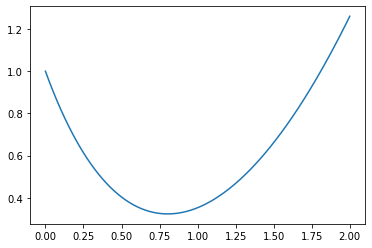

In [0]:
# Как бы main, тут вызываются функции, описанные сверху, с аргументами, заданными в ячейке сверху.
Y = Runge_Rule(a, b, y0, eps, p)
x = np.linspace(a, b, Y.size)
print("Итоговое число разбиений, чтобы достичь точность в {}: {}".format(str(eps), str(Y.size)))
plt.plot(x, Y)
plt.show()

Итоговое число разбиений, чтобы достичь точность в 0.001: 1280


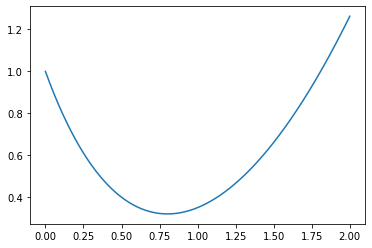

In [0]:
# Тут Эйлер для сравнения 
Y = Runge_Rule(a, b, y0, eps, 1)
x = np.linspace(a, b, Y.size)
print("Итоговое число разбиений, чтобы достичь точность в {}: {}".format(str(eps), str(Y.size)))
plt.plot(x, Y)
plt.show()